# Train a VAE on Cell Painting LINCS Data

In [4]:
import sys
import pathlib
import numpy as np
import pandas as pd

from tensorflow import keras

sys.path.insert(0, "../../scripts")
from utils import load_data, infer_L1000_features
from vae import VAE
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


In [5]:
# %load_ext nb_black

In [6]:
# np.random.seed(123)
# python_random.seed(123)
# tf.random.set_random_seed(1234)

In [7]:
# data_splits = ["train", "valid", "test", "complete"]
data_splits = ["test"]
data_dict = load_data(data_splits, dataset="L1000")

In [8]:
# Prepare data for training

meta_features = infer_L1000_features(data_dict["test"], metadata=True)
profile_features = infer_L1000_features(data_dict["test"])

# train_features_df = data_dict["train"].reindex(profile_features, axis="columns")
# train_meta_df = data_dict["train"].reindex(meta_features, axis="columns")

# valid_features_df = data_dict["valid"].reindex(profile_features, axis="columns")
# valid_meta_df = data_dict["valid"].reindex(meta_features, axis="columns")

test_features_df = data_dict["test"].reindex(profile_features, axis="columns")
test_meta_df = data_dict["test"].reindex(meta_features, axis="columns")

# complete_features_df = data_dict["complete"].reindex(profile_features, axis="columns")
# complete_meta_df = data_dict["complete"].reindex(meta_features, axis="columns")

In [9]:
components = np.arange(1, 51)
reconstructions = []
for component in components:
    pca = PCA(n_components=component)
    principalComponents = pca.fit_transform(test_features_df)
    reconstruction = pca.inverse_transform(principalComponents)
    reconstructions.append(reconstruction)


In [10]:
frobenius_norms = []
test_features = np.array(test_features_df)
for reconstruction in reconstructions:
    frobenius_norms.append(
        (sum(sum((test_features - reconstruction) ** 2))) ** 0.5
    )

Text(0.5, 1.0, 'L1000 pca')

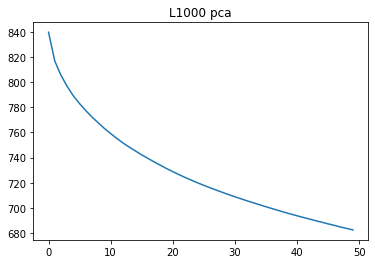

In [11]:
plt.plot(frobenius_norms)
plt.title('L1000 pca')